<a href="https://colab.research.google.com/github/Angeldahal/nepali-digits-classification/blob/main/Nepali_Digits_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np


In [23]:
train = pd.read_csv("/content/train_digits_data.csv")
test = pd.read_csv("/content/test_digits_data.csv")

In [24]:
train.head()

,pixel_0000,pixel_0001,pixel_0002,pixel_0003,pixel_0004,pixel_0005,pixel_0006,pixel_0007,pixel_0008,pixel_0009,...,pixel_1015,pixel_1016,pixel_1017,pixel_1018,pixel_1019,pixel_1020,pixel_1021,pixel_1022,pixel_1023,character
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,digit_0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,digit_0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,digit_0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,digit_0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,digit_0


In [25]:
test.head()

,pixel_0000,pixel_0001,pixel_0002,pixel_0003,pixel_0004,pixel_0005,pixel_0006,pixel_0007,pixel_0008,pixel_0009,...,pixel_1015,pixel_1016,pixel_1017,pixel_1018,pixel_1019,pixel_1020,pixel_1021,pixel_1022,pixel_1023,character
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,digit_0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,digit_0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,digit_0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,digit_0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,digit_0


In [26]:
## Load the TensorBoard notebook extension
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [27]:
# Clear any logs from previous runs
!rm -rf ./.logs/


In [28]:
train.info(), train.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Columns: 1025 entries, pixel_0000 to character
dtypes: int64(1024), object(1)
memory usage: 132.9+ MB


(None, (17000, 1025))

In [29]:
test.info(), test.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Columns: 1025 entries, pixel_0000 to character
dtypes: int64(1024), object(1)
memory usage: 23.5+ MB


(None, (3000, 1025))

In [30]:
train.isna().sum()

pixel_0000    0
pixel_0001    0
pixel_0002    0
pixel_0003    0
pixel_0004    0
             ..
pixel_1020    0
pixel_1021    0
pixel_1022    0
pixel_1023    0
character     0
Length: 1025, dtype: int64

In [55]:
X = train.iloc[:, 0:1024]
y = train.iloc[:, -1]

X_test = test.iloc[:, 0:1024]
y_test = test.iloc[:, -1]

In [53]:
X.head()

,pixel_0000,pixel_0001,pixel_0002,pixel_0003,pixel_0004,pixel_0005,pixel_0006,pixel_0007,pixel_0008,pixel_0009,...,pixel_1014,pixel_1015,pixel_1016,pixel_1017,pixel_1018,pixel_1019,pixel_1020,pixel_1021,pixel_1022,pixel_1023
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
y.head()

0    digit_0
1    digit_0
2    digit_0
3    digit_0
4    digit_0
Name: character, dtype: object

### 3.3 | Splitting data into training and validation

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.15, random_state=42)

In [57]:
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_validation:', X_validation.shape)
print('y_validation:', y_validation.shape)

X_train: (14450, 1024)
y_train: (14450,)
X_validation: (2550, 1024)
y_validation: (2550,)


In [59]:
X_test.shape

(3000, 1024)

In [60]:
X_train_re = X_train.to_numpy().reshape(14450, 32, 32)
y_train_re = y_train.values
X_validation_re = X_validation.to_numpy().reshape(2550, 32, 32)
y_validation_re = y_validation.values

X_test_re = X_test.to_numpy().reshape(3000, 32, 32)
y_test_re = y_test.values

In [62]:
# Save image parameters to the constants that we will use later for data re-shaping and for model traning.
(_, IMAGE_WIDTH, IMAGE_HEIGHT) = X_train_re.shape
IMAGE_CHANNELS = 1

print('IMAGE_WIDTH:', IMAGE_WIDTH);
print('IMAGE_HEIGHT:', IMAGE_HEIGHT);
print('IMAGE_CHANNELS:', IMAGE_CHANNELS);

IMAGE_WIDTH: 32
IMAGE_HEIGHT: 32
IMAGE_CHANNELS: 1


## Visualize How the Digits were written

In [63]:
pd.DataFrame(X_train_re[0])

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,50,79,94,88,67,27,4,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,241,254,255,255,248,201,84,11,0,0
4,0,0,0,0,0,0,0,0,0,0,...,255,255,255,255,255,255,230,97,0,0
5,0,0,0,0,0,0,0,0,0,0,...,255,255,251,251,255,255,255,231,0,0
6,0,0,0,0,0,0,0,0,0,4,...,131,109,71,77,141,237,255,255,0,0
7,0,0,0,0,0,0,0,0,4,62,...,3,2,0,1,14,159,255,255,0,0
8,0,0,0,0,0,0,0,0,11,139,...,0,0,0,0,9,147,255,255,0,0
9,0,0,0,0,0,0,0,0,7,96,...,0,0,0,0,22,188,255,255,0,0


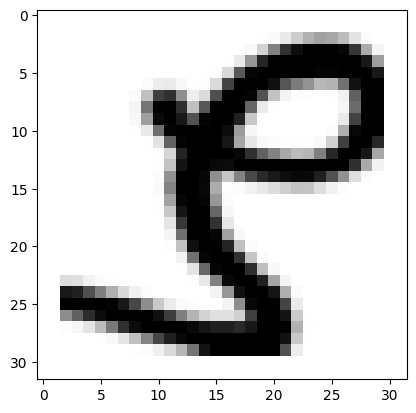

In [69]:
from matplotlib import pyplot as plt
plt.imshow(X_train_re[0], cmap=plt.cm.binary)
plt.show()

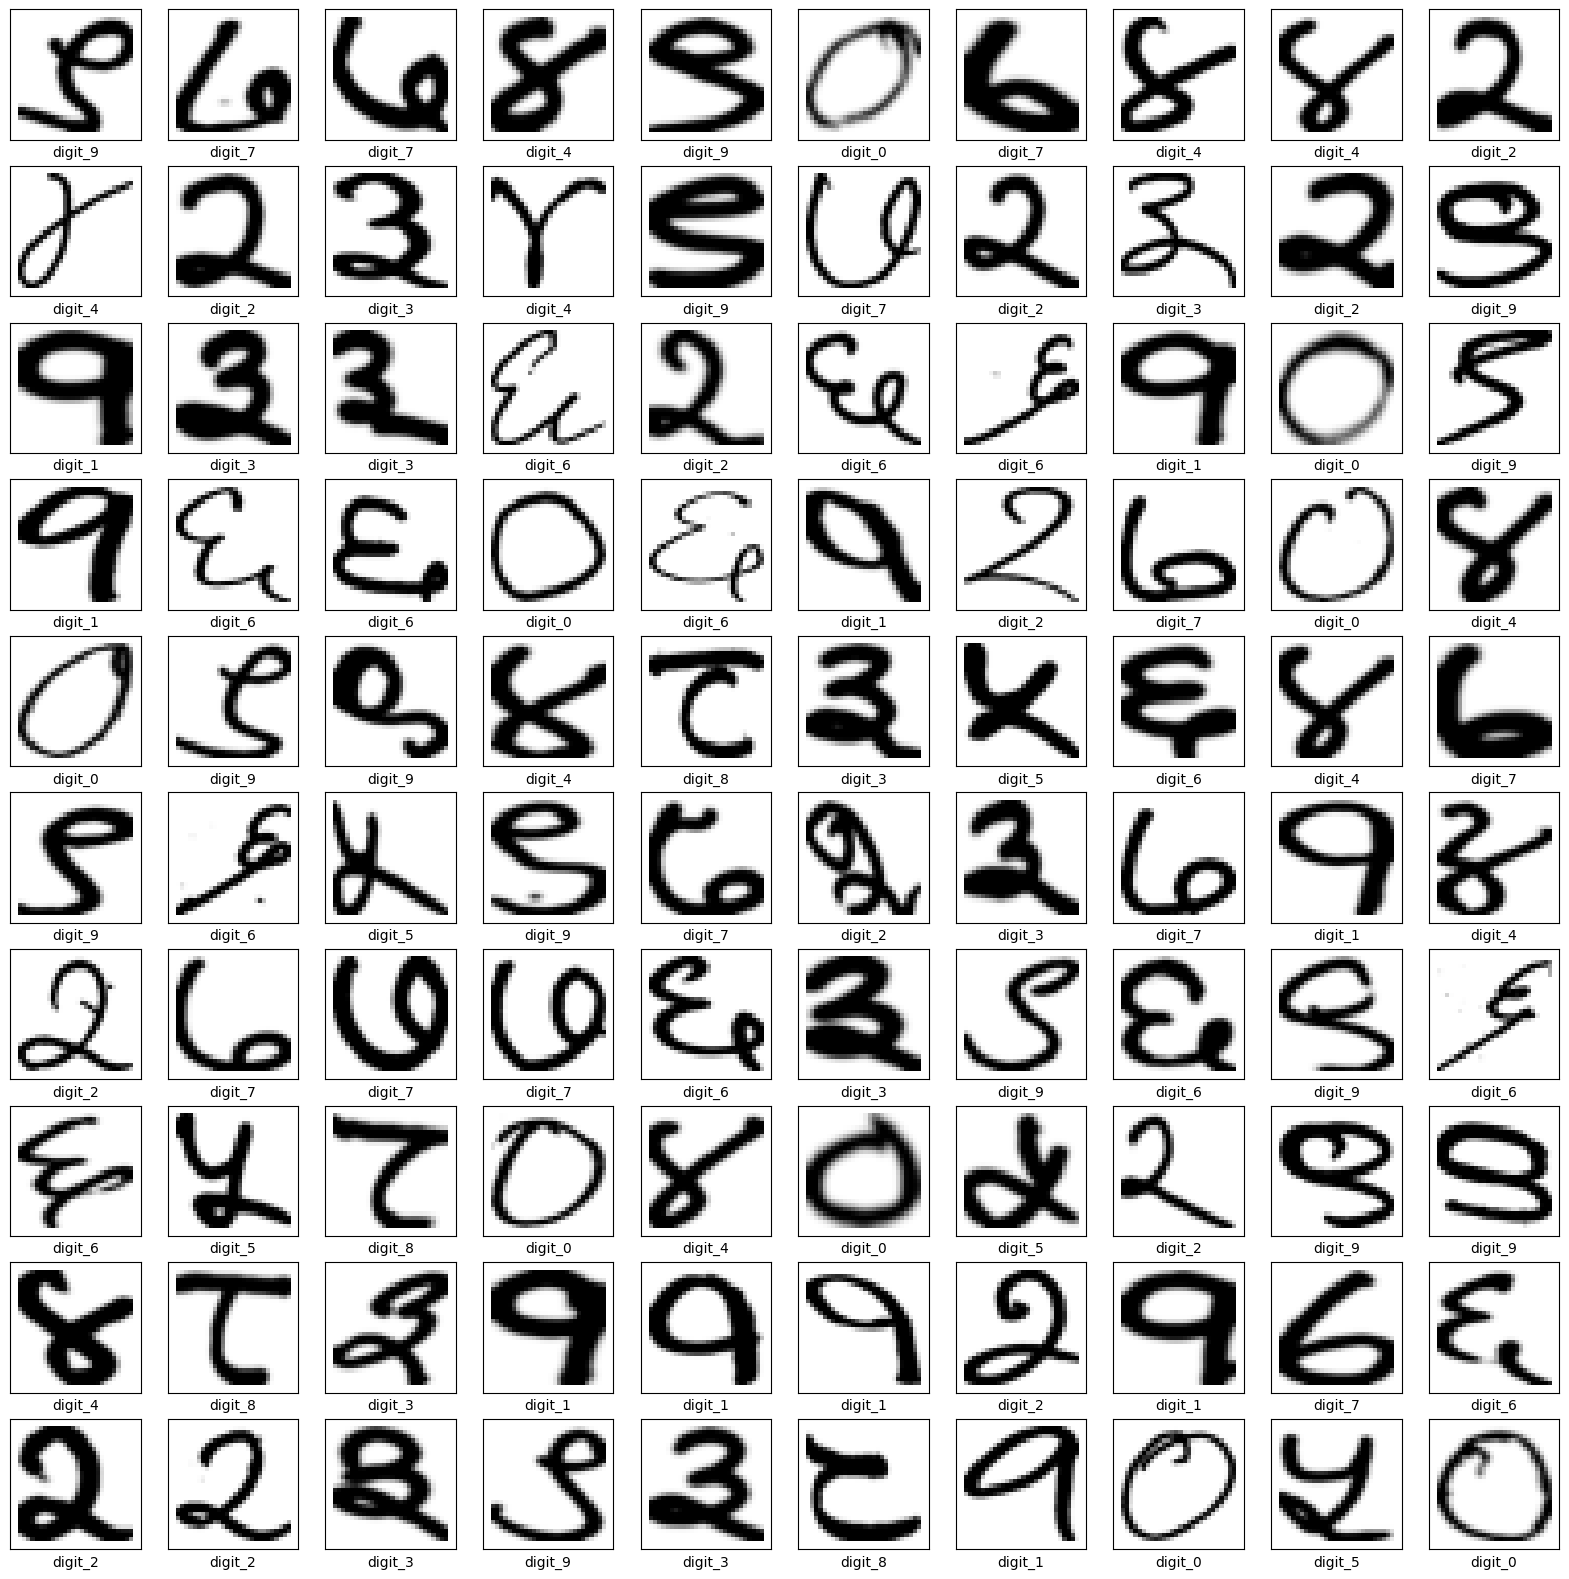

In [70]:
import math

numbers_to_display = 100
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(20, 20))

for i in range(numbers_to_display):
  plt.subplot(num_cells, num_cells, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X_train_re[i], cmap=plt.cm.binary)
  plt.xlabel(y_train_re[i])
plt.show()

## Reshaping to train using CNN

In [71]:
X_train_with_chanels = X_train_re.reshape(
    X_train_re.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

X_validation_with_chanels = X_validation_re.reshape(
    X_validation_re.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS

)

X_test_with_chanels = X_test_re.reshape(
    X_test_re.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

In [72]:
print('x_train_with_chanels:', X_train_with_chanels.shape)
print('x_validation_with_chanels:', X_validation_with_chanels.shape)
print('x_test_with_chanels:', X_test_with_chanels.shape)

x_train_with_chanels: (14450, 32, 32, 1)
x_validation_with_chanels: (2550, 32, 32, 1)
x_test_with_chanels: (3000, 32, 32, 1)


## Normalize train, test and validation data

In [73]:
X_train_norm = X_train_with_chanels / 255
X_validation_norm = X_validation_with_chanels / 255
X_test_norm = X_test_with_chanels / 255

In [75]:
X_train_norm[0][10]

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.00392157],
       [0.08627451],
       [0.56862745],
       [0.98431373],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [0.95686275],
       [0.39215686],
       [0.03529412],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.01568627],
       [0.31764706],
       [0.96470588],
       [1.        ],
       [1.        ],
       [0.        ],
       [0.        ]])

## Building the CNN Model

In [76]:
import tensorflow as tf

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Convolution2D(
    input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS),
    kernel_size=5,
    filters=8,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model.add(tf.keras.layers.Convolution2D(
    kernel_size=5,
    filters=16,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(
    units=128,
    activation=tf.keras.activations.relu
))

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(
    units=10,
    activation=tf.keras.activations.softmax,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

In [77]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 8)         208       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        3216      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 128)               5

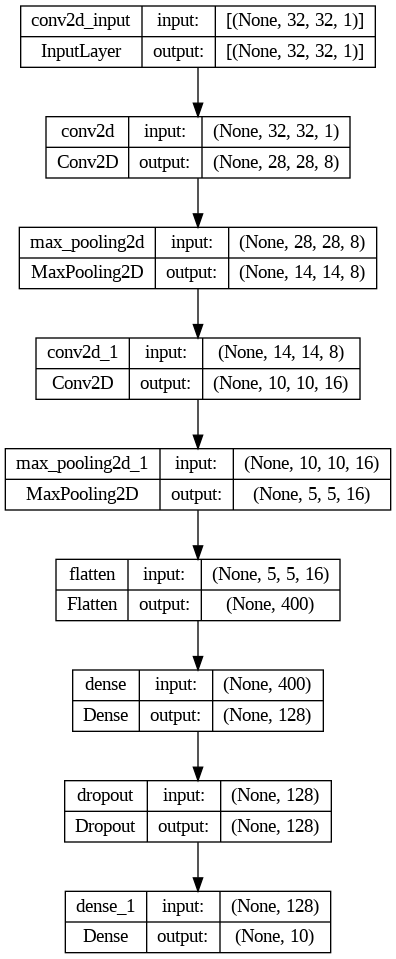

In [78]:
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
)

## Compiling the model using Adam optimizer

In [91]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
  optimizer=adam_optimizer,
  loss=tf.keras.losses.sparse_categorical_crossentropy,
  metrics=['accuracy']
)

## Label Encoding (Almost Forgot)

In [92]:
from sklearn.preprocessing import LabelEncoder

desired_order = ['digit_0', 'digit_1','digit_2', 'digit_3', 'digit_4', 'digit_5', 'digit_6', 'digit_7', 'digit_8', 'digit_9']

encoder = LabelEncoder()
encoder.fit(desired_order)

y_train_re = encoder.transform(y_train_re)
y_validation_re = encoder.transform(y_validation_re)

## Train the model

In [94]:
import datetime

log_dir=".logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

training_history = model.fit(
    X_train_norm,
    y_train_re,
    epochs=10,
    validation_data=(X_validation_norm, y_validation_re),
    callbacks=[tensorboard_callback]
)

print("The model has successfully trained")

Epoch 1/10
452/452 [==============================] - 14s 27ms/step - loss: 0.3640 - accuracy: 0.8848 - val_loss: 0.0683 - val_accuracy: 0.9816
Epoch 2/10
452/452 [==============================] - 12s 26ms/step - loss: 0.0765 - accuracy: 0.9758 - val_loss: 0.0377 - val_accuracy: 0.9890
Epoch 3/10
452/452 [==============================] - 12s 27ms/step - loss: 0.0468 - accuracy: 0.9855 - val_loss: 0.0343 - val_accuracy: 0.9882
Epoch 4/10
452/452 [==============================] - 12s 26ms/step - loss: 0.0312 - accuracy: 0.9901 - val_loss: 0.0313 - val_accuracy: 0.9906
Epoch 5/10
452/452 [==============================] - 12s 27ms/step - loss: 0.0250 - accuracy: 0.9919 - val_loss: 0.0410 - val_accuracy: 0.9878
Epoch 6/10
452/452 [==============================] - 12s 26ms/step - loss: 0.0184 - accuracy: 0.9938 - val_loss: 0.0314 - val_accuracy: 0.9906
Epoch 7/10
452/452 [==============================] - 12s 26ms/step - loss: 0.0181 - accuracy: 0.9940 - val_loss: 0.0457 - val_accuracy:

## <span style='color:rgb(205, 0, 153)'> 6 | Model evaluation </span><a class ="anchor" id ="modelEvaluation"></a>
<hr>

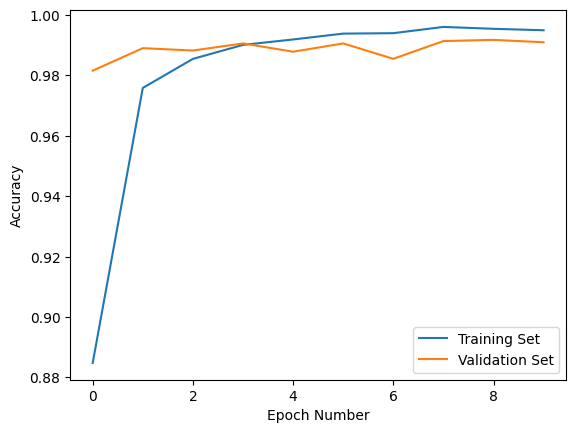

In [95]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['accuracy'], label='Training Set')
plt.plot(training_history.history['val_accuracy'], label='Validation Set')
plt.legend()

In [97]:
from sklearn.metrics import accuracy_score, precision_score, f1_score

y_test_pred = model.predict(X_test_norm)
y_test_pred_labels = encoder.inverse_transform(y_test_pred.argmax(axis=1))

accuracy = accuracy_score(y_test_re, y_test_pred_labels)
precision = precision_score(y_test_re, y_test_pred_labels, average='macro')
f1 = f1_score(y_test_re, y_test_pred_labels, average='macro')

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("F1 Score:", f1)

94/94 [==============================] - 2s 16ms/step
Accuracy: 0.9903333333333333
Precision: 0.9903862874724707
F1 Score: 0.9903419093236675


In [99]:
y_test_pred_labels[0]

'digit_0'

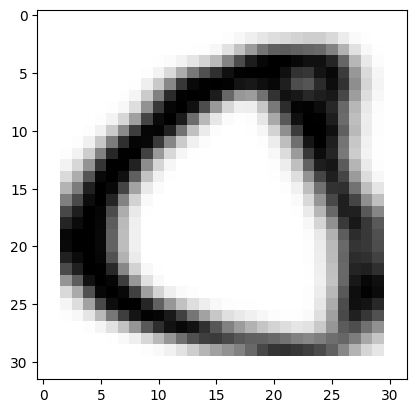

In [101]:
plt.imshow(X_test_norm[0].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=plt.cm.binary)
plt.show()